<h1>Lab 3 LLP Simulated Data</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uproot
import seaborn as sns
import math

<h3>Creating a Data Frame for LLP</h3>

In [18]:
#Takes a given data file and converts it into a table
def readFile(file, labels):
    dataFile = uproot.open(file)
    dataKey = dataFile.keys()
    i = 0
    while i < len(dataKey):
        tree = dataFile[dataKey[i]]
        i += 1
    dataFrame = tree.pandas.df(labels)
    return dataFrame

df1 = readFile(file = "df_1.root", labels = ["Jet*","Lx", "Ly", "Lz","IsLLP"])
display(df1)

,JetPt,JetEta,JetPhi,Lx,Ly,Lz,IsLLP
entry,,,,,,,
0,50.151355,1.767030,0.074290,1851.684326,178.223892,5354.035156,True
1,45.315016,1.088594,0.364831,0.000000,0.000000,0.000000,False
2,163.244844,1.709549,2.769850,609.158691,239.010056,1741.357788,True
3,147.121187,-0.237002,-0.393413,0.000000,0.000000,0.000000,False
4,54.661199,-0.730161,-2.550338,0.000000,0.000000,0.000000,False
...,...,...,...,...,...,...,...
22571,76.296273,1.114254,-1.709045,259.214996,2172.912354,3113.421875,True
22572,53.958059,0.729737,2.172977,499.816559,714.238342,664.080627,True
22573,44.355902,-1.914020,-1.443047,0.000000,0.000000,0.000000,False


<h3>Creating Histograms For Each Plot</h3>

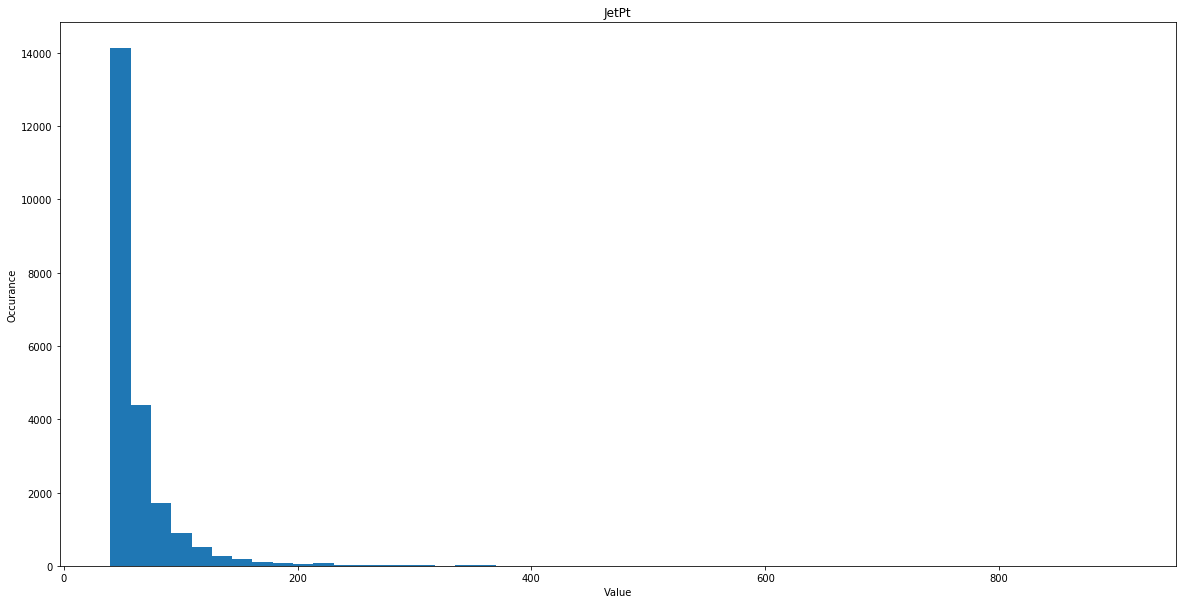

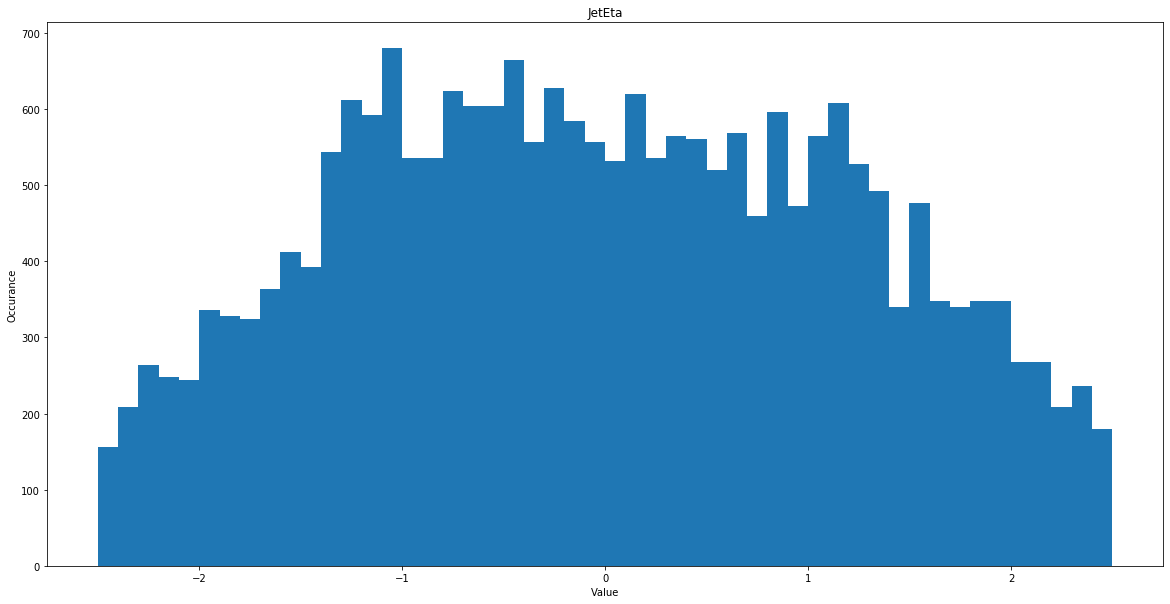

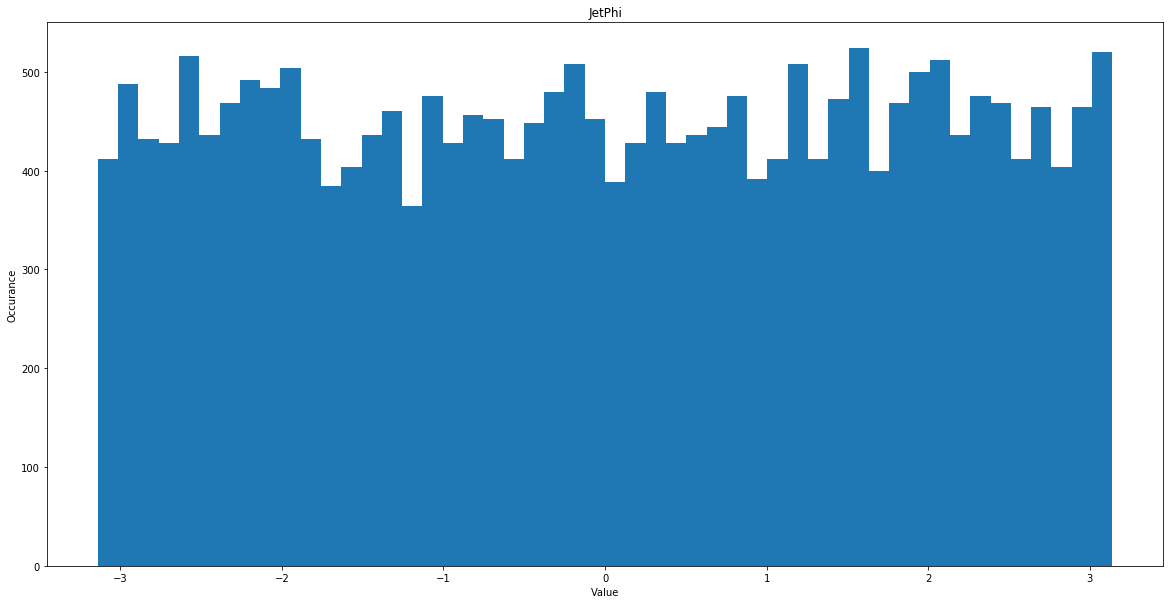

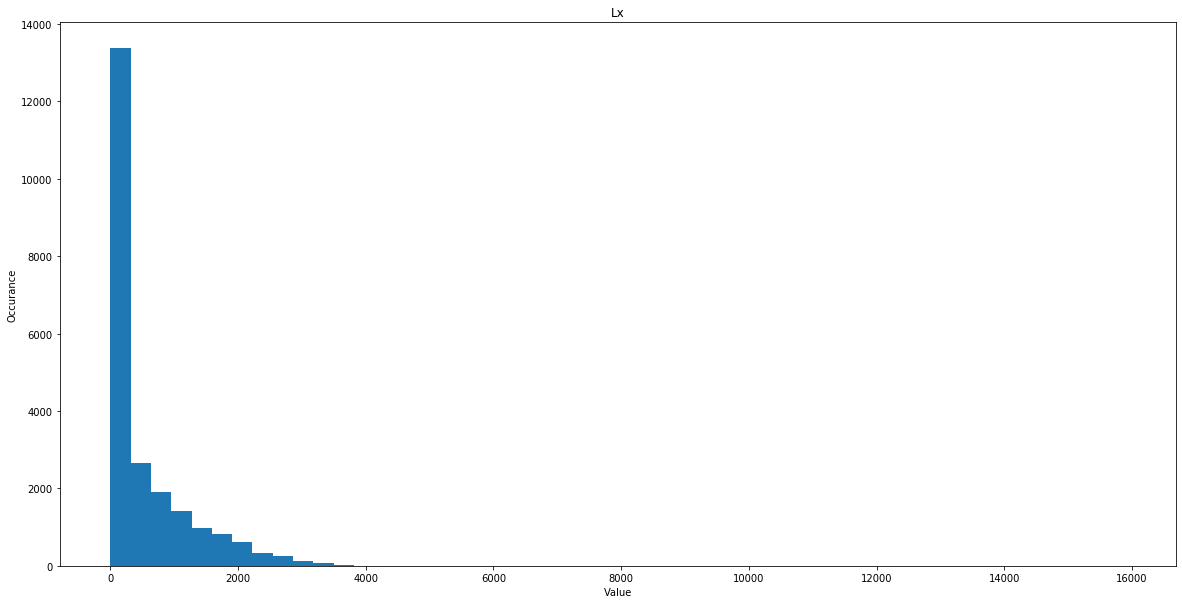

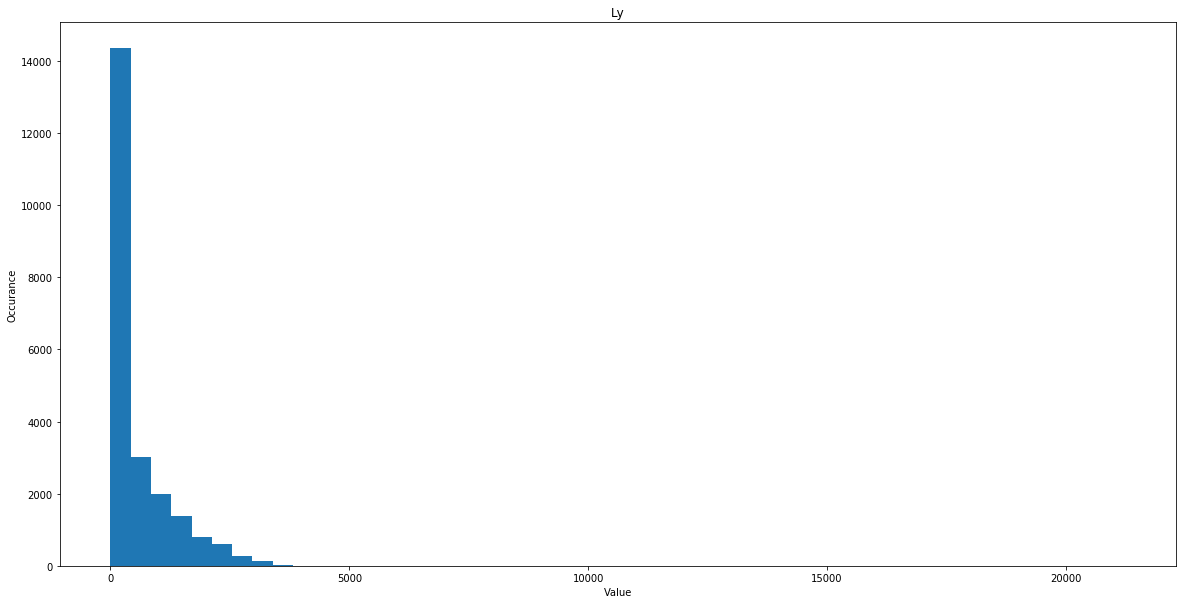

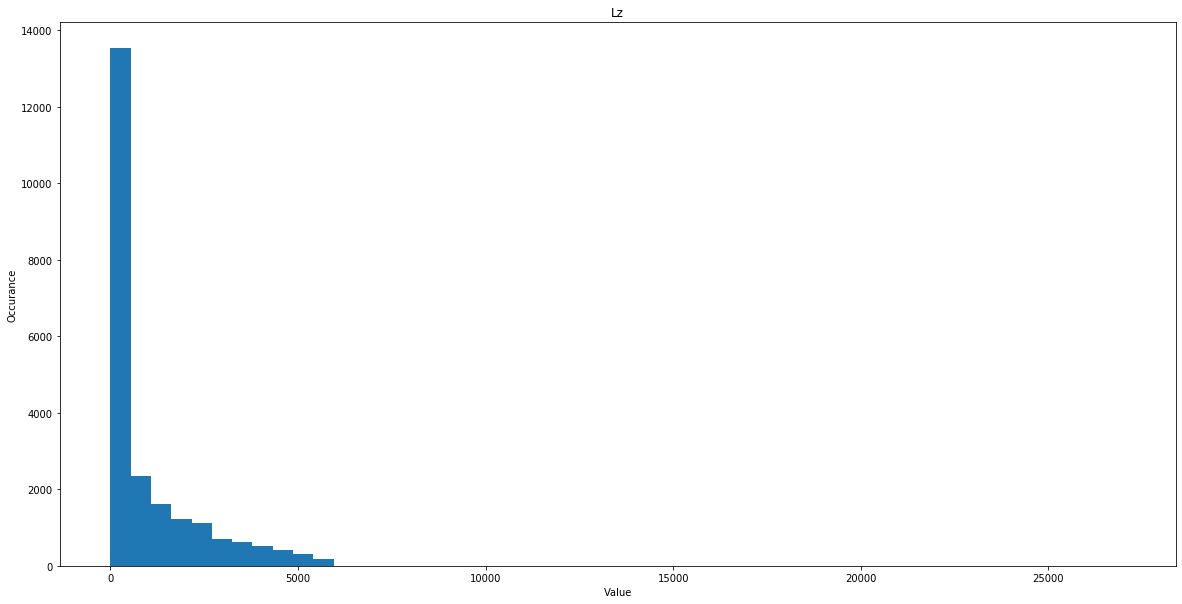

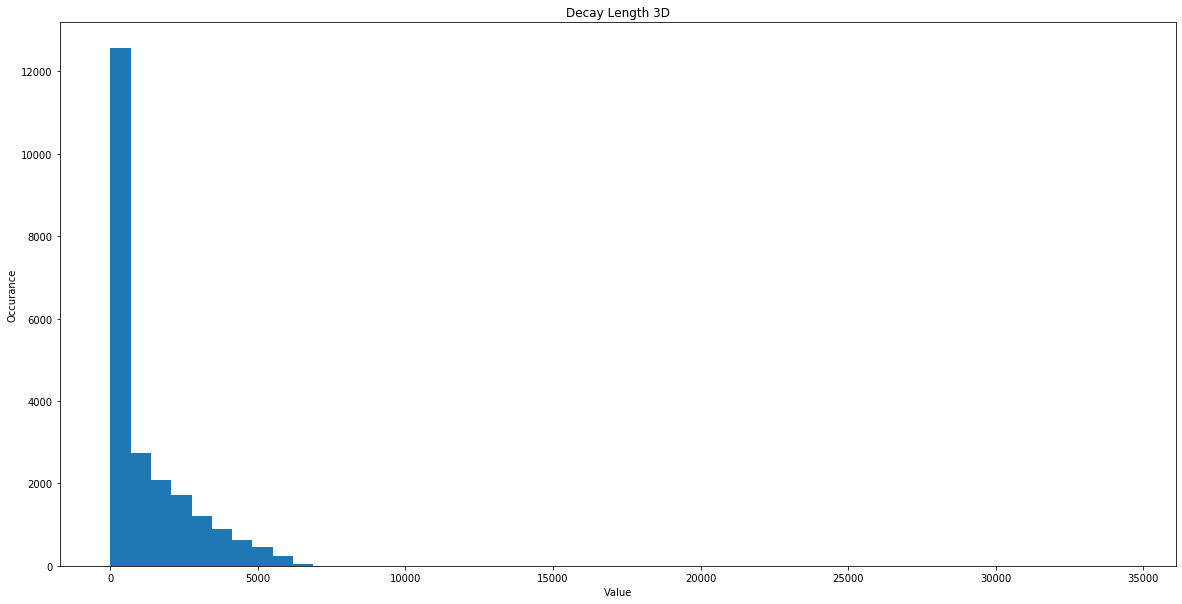

In [19]:
#Removes the IsLLP because you can not graph a boolean
df1temp = readFile(file = "df_1.root", labels = ["Jet*","Lx", "Ly", "Lz"]) 

#Calculates the decay length in 3 dimensions
i = 0
df1temp['Decay Length 3D'] = 0
for i in range(len(df1temp)):
    df1temp.iloc[i, 6] = math.sqrt(df1temp.iloc[i, 4] **2 + df1temp.iloc[i, 5] **2 + df1temp.iloc[i,6] **2)
    i += 1   
    
#Creates Histogram of given stat
def histPlot(x, title):
    plt.rcParams["figure.figsize"] = [20, 10]
    plt.hist(x, bins = 50)
    plt.xlabel("Value")
    plt.ylabel("Occurance")
    plt.title(title)
    plt.show()
    
#Goes through all the different stats
for index in df1temp.iteritems():
    histPlot(x = index[1], title = index[0]) 

<h3>Merging Data Sets</h3>

In [20]:
#Reading in the other files
df2 = readFile(file = "df_2.root", labels = ["Jet*","Lx", "Ly", "Lz","IsLLP"])
df3 = readFile(file = "df_3.root", labels = ["Jet*","Lx", "Ly", "Lz","IsLLP"])
df4 = readFile(file = "df_4.root", labels = ["Jet*","Lx", "Ly", "Lz","IsLLP"])
df5 = readFile(file = "df_5.root", labels = ["Jet*","Lx", "Ly", "Lz","IsLLP"])
df6 = readFile(file = "df_6.root", labels = ["Jet*","Lx", "Ly", "Lz","IsLLP"])

#Introducing a Data Frame marker to keep track which data frame it represents
df1['df'] = 'df1'
df2['df'] = 'df2'
df3['df'] = 'df3'
df4['df'] = 'df4'
df5['df'] = 'df5'
df6['df'] = 'df6'

def decay3D(df,num):
    i = 0
    df['Decay Length 3D'] = 0
    for i in range(len(df)):
        if df.iloc[i, 6] == True:
            df.iloc[i, num] = math.sqrt(df.iloc[i, 3] **2 + df.iloc[i, 4] **2 + df.iloc[i,5] **2)
        i += 1
    print(df)


def decay2D(df,num):
    i = 0
    df['Decay Length 2D'] = 0
    for i in range(len(df)):
        if df.iloc[i, 6] == True:
            df.iloc[i, num] = math.sqrt(df.iloc[i, 3] **2 + df.iloc[i, 4] **2)
        i += 1
    print(df)
    
#Creating one big data frame containing all the information

dataSet = np.empty(6, dtype = object)
dataSet[:] = [df1, df2, df3, df4, df5, df6]

#Uncomment this to make it run slow
#for dataf in dataSet:
#    decay3D(dataf, 8)
#    decay2D(dataf,9)
    

dataSet1 = pd.concat(dataSet, ignore_index = True)

<h3>Comparing Data Between Data Frames</h3>

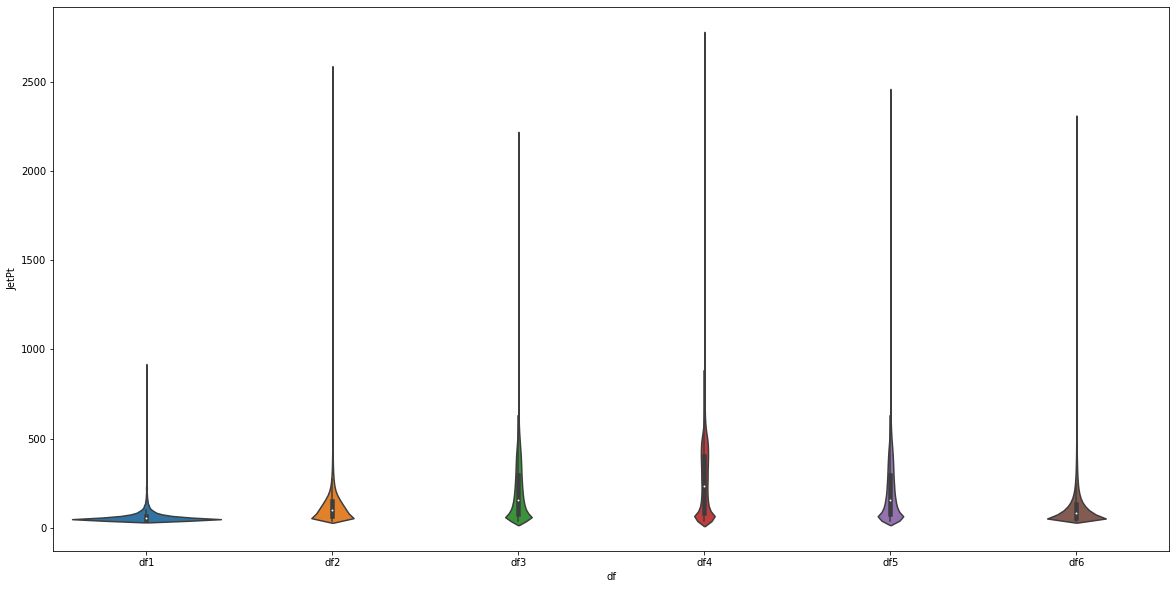

In [21]:
#Creates a plot comparing JetPt of all the data frames
sns.violinplot(data = dataSet1, x = 'df', y = "JetPt")

#Uncomment if uncommented the other code
#sns.violinplot(data = dataSet1, x = 'df', y = "Decay Length 3D")
#sns.violinplot(data = dataSet1, x = 'df', y = "Decay Length 2D")

I am pretty confident the graph would come out correctly just I am not sure if there is a shorter way to computer the distance.

<h3>Seperating Data Based On LLP</h3>

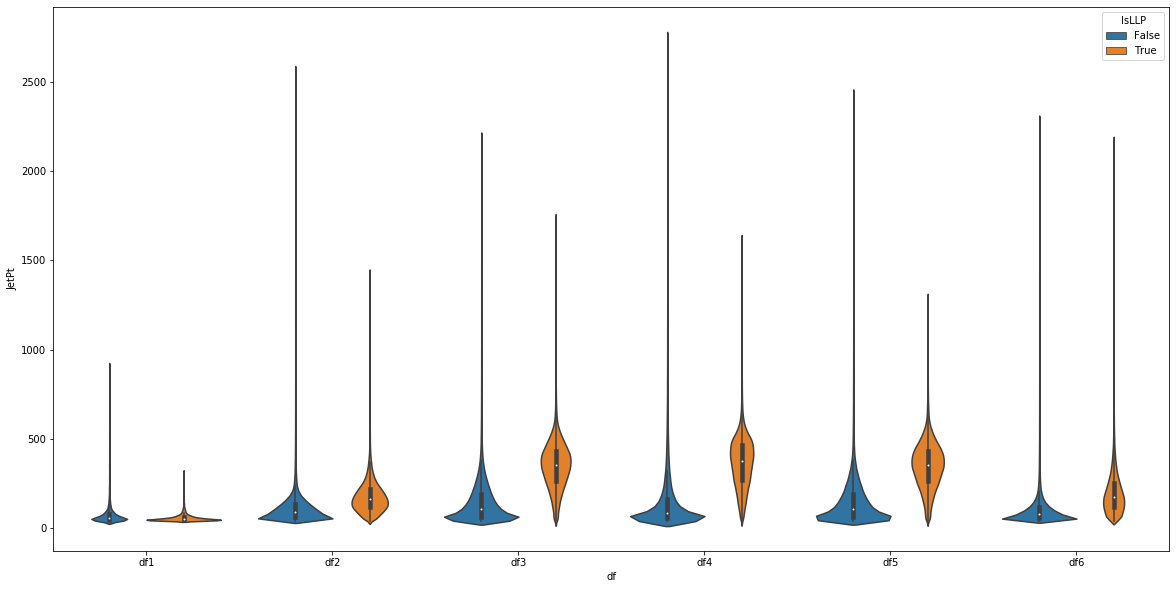

In [22]:
#Seperates the data by LLP
sns.violinplot(data = dataSet1, x = 'df', y = 'JetPt', hue = 'IsLLP')

#Uncomment if uncommented other code
#sns.violinplot(data = dataSet1, x = 'df', y = 'Decay Length 3D', hue = 'IsLLP')
#sns.violinplot(data = dataSet1, x = 'df', y = 'Decay Length 2D', hue = 'IsLLP')

I know I would do the same thing as the last section just adding the hue of IsLLP to each plot